In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

In [2]:
def my_fun(a, b, n_samples, noise_var):
    
    X = np.linspace(a, b, n_samples)
    y = 2**np.cos(X**2) + np.random.normal(0, noise_var, n_samples)
    
    return X.reshape(-1,1), y.reshape(-1,1)

Try with noise_var = 0, 0.1, 0.5

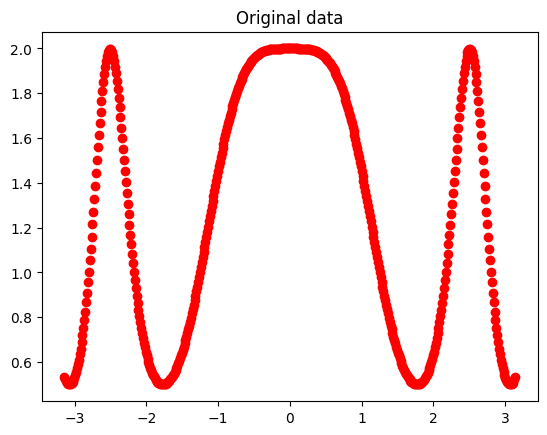

In [3]:
X_np, y_np = my_fun(-np.pi, np.pi, n_samples=500, noise_var=0.0)

plt.plot(X_np, y_np, 'ro')
plt.title('Original data')
plt.show()
plt.close()

In [4]:
X = torch.from_numpy(X_np.astype(np.float32))
y = torch.from_numpy(y_np.astype(np.float32))
y = y.view(y.shape[0],1)   

n_samples, n_features = X.shape

In [5]:
input_size = n_features
output_size = 1

Try with the commented lines

In [6]:
class DNN(nn.Module):
    
    def __init__(self, n):
        super(DNN, self).__init__()

        self.L = len(n) - 1
        self.actfun = nn.Sigmoid
        #self.actfun = nn.Tanh

        layers = list()
        for i in range(self.L - 1):
            layers.append( (f'l_{i+1}', nn.Linear(n[i], n[i+1])) )
            layers.append( (f'actfun_{i+1}', self.actfun()) )
            
        layers.append(( f'l_{self.L}', nn.Linear(n[-2], n[-1])) )
        self.layers = nn.Sequential( OrderedDict(layers) )

    
    def forward(self, x):
        return self.layers(x)
    
# -----------------------------------------------------------------|
model = DNN(n = [input_size, output_size])  
#model = DNN(n = [input_size, 20, output_size])  
#model = DNN(n = [input_size, 20, 20, 20, 20, 20, output_size]) 
#model = DNN(n = [input_size, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, output_size]) 

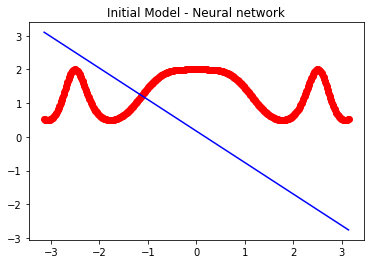

In [7]:
y_hat = model(X)

plt.plot(X_np, y_np, 'ro')
plt.plot(X_np, y_hat.detach().numpy(), 'b')
plt.title('Initial Model - Neural network')
plt.show()
plt.close()

In [8]:
learning_rate = 1e-2
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

In [9]:
MaxIters = 100000
for iter in range(MaxIters):

    # Forward
    y_hat = model(X)
    Err = criterion(y_hat, y)

    # Backward
    Err.backward()

    # Updating
    optimizer.step()
    optimizer.zero_grad()

    if ( iter % 5 == 0 ):
        print(f'iteration #{str(iter)},   Err = {Err.item():.4f}')

iteration #0,   Err = 4.4251
iteration #5,   Err = 2.7778
iteration #10,   Err = 1.8765
iteration #15,   Err = 1.3645
iteration #20,   Err = 1.0595
iteration #25,   Err = 0.8674
iteration #30,   Err = 0.7394
iteration #35,   Err = 0.6494
iteration #40,   Err = 0.5832
iteration #45,   Err = 0.5329
iteration #50,   Err = 0.4936
iteration #55,   Err = 0.4624
iteration #60,   Err = 0.4375
iteration #65,   Err = 0.4173
iteration #70,   Err = 0.4010
iteration #75,   Err = 0.3877
iteration #80,   Err = 0.3768
iteration #85,   Err = 0.3680
iteration #90,   Err = 0.3608
iteration #95,   Err = 0.3549
iteration #100,   Err = 0.3501
iteration #105,   Err = 0.3462
iteration #110,   Err = 0.3430
iteration #115,   Err = 0.3403
iteration #120,   Err = 0.3382
iteration #125,   Err = 0.3365
iteration #130,   Err = 0.3350
iteration #135,   Err = 0.3339
iteration #140,   Err = 0.3329
iteration #145,   Err = 0.3321
iteration #150,   Err = 0.3315
iteration #155,   Err = 0.3310
iteration #160,   Err = 0.3305

iteration #1895,   Err = 0.3286
iteration #1900,   Err = 0.3286
iteration #1905,   Err = 0.3286
iteration #1910,   Err = 0.3286
iteration #1915,   Err = 0.3286
iteration #1920,   Err = 0.3286
iteration #1925,   Err = 0.3286
iteration #1930,   Err = 0.3286
iteration #1935,   Err = 0.3286
iteration #1940,   Err = 0.3286
iteration #1945,   Err = 0.3286
iteration #1950,   Err = 0.3286
iteration #1955,   Err = 0.3286
iteration #1960,   Err = 0.3286
iteration #1965,   Err = 0.3286
iteration #1970,   Err = 0.3286
iteration #1975,   Err = 0.3286
iteration #1980,   Err = 0.3286
iteration #1985,   Err = 0.3286
iteration #1990,   Err = 0.3286
iteration #1995,   Err = 0.3286
iteration #2000,   Err = 0.3286
iteration #2005,   Err = 0.3286
iteration #2010,   Err = 0.3286
iteration #2015,   Err = 0.3286
iteration #2020,   Err = 0.3286
iteration #2025,   Err = 0.3286
iteration #2030,   Err = 0.3286
iteration #2035,   Err = 0.3286
iteration #2040,   Err = 0.3286
iteration #2045,   Err = 0.3286
iteratio

iteration #3840,   Err = 0.3286
iteration #3845,   Err = 0.3286
iteration #3850,   Err = 0.3286
iteration #3855,   Err = 0.3286
iteration #3860,   Err = 0.3286
iteration #3865,   Err = 0.3286
iteration #3870,   Err = 0.3286
iteration #3875,   Err = 0.3286
iteration #3880,   Err = 0.3286
iteration #3885,   Err = 0.3286
iteration #3890,   Err = 0.3286
iteration #3895,   Err = 0.3286
iteration #3900,   Err = 0.3286
iteration #3905,   Err = 0.3286
iteration #3910,   Err = 0.3286
iteration #3915,   Err = 0.3286
iteration #3920,   Err = 0.3286
iteration #3925,   Err = 0.3286
iteration #3930,   Err = 0.3286
iteration #3935,   Err = 0.3286
iteration #3940,   Err = 0.3286
iteration #3945,   Err = 0.3286
iteration #3950,   Err = 0.3286
iteration #3955,   Err = 0.3286
iteration #3960,   Err = 0.3286
iteration #3965,   Err = 0.3286
iteration #3970,   Err = 0.3286
iteration #3975,   Err = 0.3286
iteration #3980,   Err = 0.3286
iteration #3985,   Err = 0.3286
iteration #3990,   Err = 0.3286
iteratio

iteration #5725,   Err = 0.3286
iteration #5730,   Err = 0.3286
iteration #5735,   Err = 0.3286
iteration #5740,   Err = 0.3286
iteration #5745,   Err = 0.3286
iteration #5750,   Err = 0.3286
iteration #5755,   Err = 0.3286
iteration #5760,   Err = 0.3286
iteration #5765,   Err = 0.3286
iteration #5770,   Err = 0.3286
iteration #5775,   Err = 0.3286
iteration #5780,   Err = 0.3286
iteration #5785,   Err = 0.3286
iteration #5790,   Err = 0.3286
iteration #5795,   Err = 0.3286
iteration #5800,   Err = 0.3286
iteration #5805,   Err = 0.3286
iteration #5810,   Err = 0.3286
iteration #5815,   Err = 0.3286
iteration #5820,   Err = 0.3286
iteration #5825,   Err = 0.3286
iteration #5830,   Err = 0.3286
iteration #5835,   Err = 0.3286
iteration #5840,   Err = 0.3286
iteration #5845,   Err = 0.3286
iteration #5850,   Err = 0.3286
iteration #5855,   Err = 0.3286
iteration #5860,   Err = 0.3286
iteration #5865,   Err = 0.3286
iteration #5870,   Err = 0.3286
iteration #5875,   Err = 0.3286
iteratio

iteration #7590,   Err = 0.3286
iteration #7595,   Err = 0.3286
iteration #7600,   Err = 0.3286
iteration #7605,   Err = 0.3286
iteration #7610,   Err = 0.3286
iteration #7615,   Err = 0.3286
iteration #7620,   Err = 0.3286
iteration #7625,   Err = 0.3286
iteration #7630,   Err = 0.3286
iteration #7635,   Err = 0.3286
iteration #7640,   Err = 0.3286
iteration #7645,   Err = 0.3286
iteration #7650,   Err = 0.3286
iteration #7655,   Err = 0.3286
iteration #7660,   Err = 0.3286
iteration #7665,   Err = 0.3286
iteration #7670,   Err = 0.3286
iteration #7675,   Err = 0.3286
iteration #7680,   Err = 0.3286
iteration #7685,   Err = 0.3286
iteration #7690,   Err = 0.3286
iteration #7695,   Err = 0.3286
iteration #7700,   Err = 0.3286
iteration #7705,   Err = 0.3286
iteration #7710,   Err = 0.3286
iteration #7715,   Err = 0.3286
iteration #7720,   Err = 0.3286
iteration #7725,   Err = 0.3286
iteration #7730,   Err = 0.3286
iteration #7735,   Err = 0.3286
iteration #7740,   Err = 0.3286
iteratio

iteration #9555,   Err = 0.3286
iteration #9560,   Err = 0.3286
iteration #9565,   Err = 0.3286
iteration #9570,   Err = 0.3286
iteration #9575,   Err = 0.3286
iteration #9580,   Err = 0.3286
iteration #9585,   Err = 0.3286
iteration #9590,   Err = 0.3286
iteration #9595,   Err = 0.3286
iteration #9600,   Err = 0.3286
iteration #9605,   Err = 0.3286
iteration #9610,   Err = 0.3286
iteration #9615,   Err = 0.3286
iteration #9620,   Err = 0.3286
iteration #9625,   Err = 0.3286
iteration #9630,   Err = 0.3286
iteration #9635,   Err = 0.3286
iteration #9640,   Err = 0.3286
iteration #9645,   Err = 0.3286
iteration #9650,   Err = 0.3286
iteration #9655,   Err = 0.3286
iteration #9660,   Err = 0.3286
iteration #9665,   Err = 0.3286
iteration #9670,   Err = 0.3286
iteration #9675,   Err = 0.3286
iteration #9680,   Err = 0.3286
iteration #9685,   Err = 0.3286
iteration #9690,   Err = 0.3286
iteration #9695,   Err = 0.3286
iteration #9700,   Err = 0.3286
iteration #9705,   Err = 0.3286
iteratio

iteration #11495,   Err = 0.3286
iteration #11500,   Err = 0.3286
iteration #11505,   Err = 0.3286
iteration #11510,   Err = 0.3286
iteration #11515,   Err = 0.3286
iteration #11520,   Err = 0.3286
iteration #11525,   Err = 0.3286
iteration #11530,   Err = 0.3286
iteration #11535,   Err = 0.3286
iteration #11540,   Err = 0.3286
iteration #11545,   Err = 0.3286
iteration #11550,   Err = 0.3286
iteration #11555,   Err = 0.3286
iteration #11560,   Err = 0.3286
iteration #11565,   Err = 0.3286
iteration #11570,   Err = 0.3286
iteration #11575,   Err = 0.3286
iteration #11580,   Err = 0.3286
iteration #11585,   Err = 0.3286
iteration #11590,   Err = 0.3286
iteration #11595,   Err = 0.3286
iteration #11600,   Err = 0.3286
iteration #11605,   Err = 0.3286
iteration #11610,   Err = 0.3286
iteration #11615,   Err = 0.3286
iteration #11620,   Err = 0.3286
iteration #11625,   Err = 0.3286
iteration #11630,   Err = 0.3286
iteration #11635,   Err = 0.3286
iteration #11640,   Err = 0.3286
iteration 

iteration #13475,   Err = 0.3286
iteration #13480,   Err = 0.3286
iteration #13485,   Err = 0.3286
iteration #13490,   Err = 0.3286
iteration #13495,   Err = 0.3286
iteration #13500,   Err = 0.3286
iteration #13505,   Err = 0.3286
iteration #13510,   Err = 0.3286
iteration #13515,   Err = 0.3286
iteration #13520,   Err = 0.3286
iteration #13525,   Err = 0.3286
iteration #13530,   Err = 0.3286
iteration #13535,   Err = 0.3286
iteration #13540,   Err = 0.3286
iteration #13545,   Err = 0.3286
iteration #13550,   Err = 0.3286
iteration #13555,   Err = 0.3286
iteration #13560,   Err = 0.3286
iteration #13565,   Err = 0.3286
iteration #13570,   Err = 0.3286
iteration #13575,   Err = 0.3286
iteration #13580,   Err = 0.3286
iteration #13585,   Err = 0.3286
iteration #13590,   Err = 0.3286
iteration #13595,   Err = 0.3286
iteration #13600,   Err = 0.3286
iteration #13605,   Err = 0.3286
iteration #13610,   Err = 0.3286
iteration #13615,   Err = 0.3286
iteration #13620,   Err = 0.3286
iteration 

iteration #15445,   Err = 0.3286
iteration #15450,   Err = 0.3286
iteration #15455,   Err = 0.3286
iteration #15460,   Err = 0.3286
iteration #15465,   Err = 0.3286
iteration #15470,   Err = 0.3286
iteration #15475,   Err = 0.3286
iteration #15480,   Err = 0.3286
iteration #15485,   Err = 0.3286
iteration #15490,   Err = 0.3286
iteration #15495,   Err = 0.3286
iteration #15500,   Err = 0.3286
iteration #15505,   Err = 0.3286
iteration #15510,   Err = 0.3286
iteration #15515,   Err = 0.3286
iteration #15520,   Err = 0.3286
iteration #15525,   Err = 0.3286
iteration #15530,   Err = 0.3286
iteration #15535,   Err = 0.3286
iteration #15540,   Err = 0.3286
iteration #15545,   Err = 0.3286
iteration #15550,   Err = 0.3286
iteration #15555,   Err = 0.3286
iteration #15560,   Err = 0.3286
iteration #15565,   Err = 0.3286
iteration #15570,   Err = 0.3286
iteration #15575,   Err = 0.3286
iteration #15580,   Err = 0.3286
iteration #15585,   Err = 0.3286
iteration #15590,   Err = 0.3286
iteration 

iteration #17450,   Err = 0.3286
iteration #17455,   Err = 0.3286
iteration #17460,   Err = 0.3286
iteration #17465,   Err = 0.3286
iteration #17470,   Err = 0.3286
iteration #17475,   Err = 0.3286
iteration #17480,   Err = 0.3286
iteration #17485,   Err = 0.3286
iteration #17490,   Err = 0.3286
iteration #17495,   Err = 0.3286
iteration #17500,   Err = 0.3286
iteration #17505,   Err = 0.3286
iteration #17510,   Err = 0.3286
iteration #17515,   Err = 0.3286
iteration #17520,   Err = 0.3286
iteration #17525,   Err = 0.3286
iteration #17530,   Err = 0.3286
iteration #17535,   Err = 0.3286
iteration #17540,   Err = 0.3286
iteration #17545,   Err = 0.3286
iteration #17550,   Err = 0.3286
iteration #17555,   Err = 0.3286
iteration #17560,   Err = 0.3286
iteration #17565,   Err = 0.3286
iteration #17570,   Err = 0.3286
iteration #17575,   Err = 0.3286
iteration #17580,   Err = 0.3286
iteration #17585,   Err = 0.3286
iteration #17590,   Err = 0.3286
iteration #17595,   Err = 0.3286
iteration 

iteration #19440,   Err = 0.3286
iteration #19445,   Err = 0.3286
iteration #19450,   Err = 0.3286
iteration #19455,   Err = 0.3286
iteration #19460,   Err = 0.3286
iteration #19465,   Err = 0.3286
iteration #19470,   Err = 0.3286
iteration #19475,   Err = 0.3286
iteration #19480,   Err = 0.3286
iteration #19485,   Err = 0.3286
iteration #19490,   Err = 0.3286
iteration #19495,   Err = 0.3286
iteration #19500,   Err = 0.3286
iteration #19505,   Err = 0.3286
iteration #19510,   Err = 0.3286
iteration #19515,   Err = 0.3286
iteration #19520,   Err = 0.3286
iteration #19525,   Err = 0.3286
iteration #19530,   Err = 0.3286
iteration #19535,   Err = 0.3286
iteration #19540,   Err = 0.3286
iteration #19545,   Err = 0.3286
iteration #19550,   Err = 0.3286
iteration #19555,   Err = 0.3286
iteration #19560,   Err = 0.3286
iteration #19565,   Err = 0.3286
iteration #19570,   Err = 0.3286
iteration #19575,   Err = 0.3286
iteration #19580,   Err = 0.3286
iteration #19585,   Err = 0.3286
iteration 

iteration #21460,   Err = 0.3286
iteration #21465,   Err = 0.3286
iteration #21470,   Err = 0.3286
iteration #21475,   Err = 0.3286
iteration #21480,   Err = 0.3286
iteration #21485,   Err = 0.3286
iteration #21490,   Err = 0.3286
iteration #21495,   Err = 0.3286
iteration #21500,   Err = 0.3286
iteration #21505,   Err = 0.3286
iteration #21510,   Err = 0.3286
iteration #21515,   Err = 0.3286
iteration #21520,   Err = 0.3286
iteration #21525,   Err = 0.3286
iteration #21530,   Err = 0.3286
iteration #21535,   Err = 0.3286
iteration #21540,   Err = 0.3286
iteration #21545,   Err = 0.3286
iteration #21550,   Err = 0.3286
iteration #21555,   Err = 0.3286
iteration #21560,   Err = 0.3286
iteration #21565,   Err = 0.3286
iteration #21570,   Err = 0.3286
iteration #21575,   Err = 0.3286
iteration #21580,   Err = 0.3286
iteration #21585,   Err = 0.3286
iteration #21590,   Err = 0.3286
iteration #21595,   Err = 0.3286
iteration #21600,   Err = 0.3286
iteration #21605,   Err = 0.3286
iteration 

iteration #23380,   Err = 0.3286
iteration #23385,   Err = 0.3286
iteration #23390,   Err = 0.3286
iteration #23395,   Err = 0.3286
iteration #23400,   Err = 0.3286
iteration #23405,   Err = 0.3286
iteration #23410,   Err = 0.3286
iteration #23415,   Err = 0.3286
iteration #23420,   Err = 0.3286
iteration #23425,   Err = 0.3286
iteration #23430,   Err = 0.3286
iteration #23435,   Err = 0.3286
iteration #23440,   Err = 0.3286
iteration #23445,   Err = 0.3286
iteration #23450,   Err = 0.3286
iteration #23455,   Err = 0.3286
iteration #23460,   Err = 0.3286
iteration #23465,   Err = 0.3286
iteration #23470,   Err = 0.3286
iteration #23475,   Err = 0.3286
iteration #23480,   Err = 0.3286
iteration #23485,   Err = 0.3286
iteration #23490,   Err = 0.3286
iteration #23495,   Err = 0.3286
iteration #23500,   Err = 0.3286
iteration #23505,   Err = 0.3286
iteration #23510,   Err = 0.3286
iteration #23515,   Err = 0.3286
iteration #23520,   Err = 0.3286
iteration #23525,   Err = 0.3286
iteration 

iteration #25370,   Err = 0.3286
iteration #25375,   Err = 0.3286
iteration #25380,   Err = 0.3286
iteration #25385,   Err = 0.3286
iteration #25390,   Err = 0.3286
iteration #25395,   Err = 0.3286
iteration #25400,   Err = 0.3286
iteration #25405,   Err = 0.3286
iteration #25410,   Err = 0.3286
iteration #25415,   Err = 0.3286
iteration #25420,   Err = 0.3286
iteration #25425,   Err = 0.3286
iteration #25430,   Err = 0.3286
iteration #25435,   Err = 0.3286
iteration #25440,   Err = 0.3286
iteration #25445,   Err = 0.3286
iteration #25450,   Err = 0.3286
iteration #25455,   Err = 0.3286
iteration #25460,   Err = 0.3286
iteration #25465,   Err = 0.3286
iteration #25470,   Err = 0.3286
iteration #25475,   Err = 0.3286
iteration #25480,   Err = 0.3286
iteration #25485,   Err = 0.3286
iteration #25490,   Err = 0.3286
iteration #25495,   Err = 0.3286
iteration #25500,   Err = 0.3286
iteration #25505,   Err = 0.3286
iteration #25510,   Err = 0.3286
iteration #25515,   Err = 0.3286
iteration 

iteration #27290,   Err = 0.3286
iteration #27295,   Err = 0.3286
iteration #27300,   Err = 0.3286
iteration #27305,   Err = 0.3286
iteration #27310,   Err = 0.3286
iteration #27315,   Err = 0.3286
iteration #27320,   Err = 0.3286
iteration #27325,   Err = 0.3286
iteration #27330,   Err = 0.3286
iteration #27335,   Err = 0.3286
iteration #27340,   Err = 0.3286
iteration #27345,   Err = 0.3286
iteration #27350,   Err = 0.3286
iteration #27355,   Err = 0.3286
iteration #27360,   Err = 0.3286
iteration #27365,   Err = 0.3286
iteration #27370,   Err = 0.3286
iteration #27375,   Err = 0.3286
iteration #27380,   Err = 0.3286
iteration #27385,   Err = 0.3286
iteration #27390,   Err = 0.3286
iteration #27395,   Err = 0.3286
iteration #27400,   Err = 0.3286
iteration #27405,   Err = 0.3286
iteration #27410,   Err = 0.3286
iteration #27415,   Err = 0.3286
iteration #27420,   Err = 0.3286
iteration #27425,   Err = 0.3286
iteration #27430,   Err = 0.3286
iteration #27435,   Err = 0.3286
iteration 

iteration #29230,   Err = 0.3286
iteration #29235,   Err = 0.3286
iteration #29240,   Err = 0.3286
iteration #29245,   Err = 0.3286
iteration #29250,   Err = 0.3286
iteration #29255,   Err = 0.3286
iteration #29260,   Err = 0.3286
iteration #29265,   Err = 0.3286
iteration #29270,   Err = 0.3286
iteration #29275,   Err = 0.3286
iteration #29280,   Err = 0.3286
iteration #29285,   Err = 0.3286
iteration #29290,   Err = 0.3286
iteration #29295,   Err = 0.3286
iteration #29300,   Err = 0.3286
iteration #29305,   Err = 0.3286
iteration #29310,   Err = 0.3286
iteration #29315,   Err = 0.3286
iteration #29320,   Err = 0.3286
iteration #29325,   Err = 0.3286
iteration #29330,   Err = 0.3286
iteration #29335,   Err = 0.3286
iteration #29340,   Err = 0.3286
iteration #29345,   Err = 0.3286
iteration #29350,   Err = 0.3286
iteration #29355,   Err = 0.3286
iteration #29360,   Err = 0.3286
iteration #29365,   Err = 0.3286
iteration #29370,   Err = 0.3286
iteration #29375,   Err = 0.3286
iteration 

iteration #31165,   Err = 0.3286
iteration #31170,   Err = 0.3286
iteration #31175,   Err = 0.3286
iteration #31180,   Err = 0.3286
iteration #31185,   Err = 0.3286
iteration #31190,   Err = 0.3286
iteration #31195,   Err = 0.3286
iteration #31200,   Err = 0.3286
iteration #31205,   Err = 0.3286
iteration #31210,   Err = 0.3286
iteration #31215,   Err = 0.3286
iteration #31220,   Err = 0.3286
iteration #31225,   Err = 0.3286
iteration #31230,   Err = 0.3286
iteration #31235,   Err = 0.3286
iteration #31240,   Err = 0.3286
iteration #31245,   Err = 0.3286
iteration #31250,   Err = 0.3286
iteration #31255,   Err = 0.3286
iteration #31260,   Err = 0.3286
iteration #31265,   Err = 0.3286
iteration #31270,   Err = 0.3286
iteration #31275,   Err = 0.3286
iteration #31280,   Err = 0.3286
iteration #31285,   Err = 0.3286
iteration #31290,   Err = 0.3286
iteration #31295,   Err = 0.3286
iteration #31300,   Err = 0.3286
iteration #31305,   Err = 0.3286
iteration #31310,   Err = 0.3286
iteration 

iteration #33095,   Err = 0.3286
iteration #33100,   Err = 0.3286
iteration #33105,   Err = 0.3286
iteration #33110,   Err = 0.3286
iteration #33115,   Err = 0.3286
iteration #33120,   Err = 0.3286
iteration #33125,   Err = 0.3286
iteration #33130,   Err = 0.3286
iteration #33135,   Err = 0.3286
iteration #33140,   Err = 0.3286
iteration #33145,   Err = 0.3286
iteration #33150,   Err = 0.3286
iteration #33155,   Err = 0.3286
iteration #33160,   Err = 0.3286
iteration #33165,   Err = 0.3286
iteration #33170,   Err = 0.3286
iteration #33175,   Err = 0.3286
iteration #33180,   Err = 0.3286
iteration #33185,   Err = 0.3286
iteration #33190,   Err = 0.3286
iteration #33195,   Err = 0.3286
iteration #33200,   Err = 0.3286
iteration #33205,   Err = 0.3286
iteration #33210,   Err = 0.3286
iteration #33215,   Err = 0.3286
iteration #33220,   Err = 0.3286
iteration #33225,   Err = 0.3286
iteration #33230,   Err = 0.3286
iteration #33235,   Err = 0.3286
iteration #33240,   Err = 0.3286
iteration 

iteration #35025,   Err = 0.3286
iteration #35030,   Err = 0.3286
iteration #35035,   Err = 0.3286
iteration #35040,   Err = 0.3286
iteration #35045,   Err = 0.3286
iteration #35050,   Err = 0.3286
iteration #35055,   Err = 0.3286
iteration #35060,   Err = 0.3286
iteration #35065,   Err = 0.3286
iteration #35070,   Err = 0.3286
iteration #35075,   Err = 0.3286
iteration #35080,   Err = 0.3286
iteration #35085,   Err = 0.3286
iteration #35090,   Err = 0.3286
iteration #35095,   Err = 0.3286
iteration #35100,   Err = 0.3286
iteration #35105,   Err = 0.3286
iteration #35110,   Err = 0.3286
iteration #35115,   Err = 0.3286
iteration #35120,   Err = 0.3286
iteration #35125,   Err = 0.3286
iteration #35130,   Err = 0.3286
iteration #35135,   Err = 0.3286
iteration #35140,   Err = 0.3286
iteration #35145,   Err = 0.3286
iteration #35150,   Err = 0.3286
iteration #35155,   Err = 0.3286
iteration #35160,   Err = 0.3286
iteration #35165,   Err = 0.3286
iteration #35170,   Err = 0.3286
iteration 

iteration #36985,   Err = 0.3286
iteration #36990,   Err = 0.3286
iteration #36995,   Err = 0.3286
iteration #37000,   Err = 0.3286
iteration #37005,   Err = 0.3286
iteration #37010,   Err = 0.3286
iteration #37015,   Err = 0.3286
iteration #37020,   Err = 0.3286
iteration #37025,   Err = 0.3286
iteration #37030,   Err = 0.3286
iteration #37035,   Err = 0.3286
iteration #37040,   Err = 0.3286
iteration #37045,   Err = 0.3286
iteration #37050,   Err = 0.3286
iteration #37055,   Err = 0.3286
iteration #37060,   Err = 0.3286
iteration #37065,   Err = 0.3286
iteration #37070,   Err = 0.3286
iteration #37075,   Err = 0.3286
iteration #37080,   Err = 0.3286
iteration #37085,   Err = 0.3286
iteration #37090,   Err = 0.3286
iteration #37095,   Err = 0.3286
iteration #37100,   Err = 0.3286
iteration #37105,   Err = 0.3286
iteration #37110,   Err = 0.3286
iteration #37115,   Err = 0.3286
iteration #37120,   Err = 0.3286
iteration #37125,   Err = 0.3286
iteration #37130,   Err = 0.3286
iteration 

iteration #38935,   Err = 0.3286
iteration #38940,   Err = 0.3286
iteration #38945,   Err = 0.3286
iteration #38950,   Err = 0.3286
iteration #38955,   Err = 0.3286
iteration #38960,   Err = 0.3286
iteration #38965,   Err = 0.3286
iteration #38970,   Err = 0.3286
iteration #38975,   Err = 0.3286
iteration #38980,   Err = 0.3286
iteration #38985,   Err = 0.3286
iteration #38990,   Err = 0.3286
iteration #38995,   Err = 0.3286
iteration #39000,   Err = 0.3286
iteration #39005,   Err = 0.3286
iteration #39010,   Err = 0.3286
iteration #39015,   Err = 0.3286
iteration #39020,   Err = 0.3286
iteration #39025,   Err = 0.3286
iteration #39030,   Err = 0.3286
iteration #39035,   Err = 0.3286
iteration #39040,   Err = 0.3286
iteration #39045,   Err = 0.3286
iteration #39050,   Err = 0.3286
iteration #39055,   Err = 0.3286
iteration #39060,   Err = 0.3286
iteration #39065,   Err = 0.3286
iteration #39070,   Err = 0.3286
iteration #39075,   Err = 0.3286
iteration #39080,   Err = 0.3286
iteration 

iteration #40875,   Err = 0.3286
iteration #40880,   Err = 0.3286
iteration #40885,   Err = 0.3286
iteration #40890,   Err = 0.3286
iteration #40895,   Err = 0.3286
iteration #40900,   Err = 0.3286
iteration #40905,   Err = 0.3286
iteration #40910,   Err = 0.3286
iteration #40915,   Err = 0.3286
iteration #40920,   Err = 0.3286
iteration #40925,   Err = 0.3286
iteration #40930,   Err = 0.3286
iteration #40935,   Err = 0.3286
iteration #40940,   Err = 0.3286
iteration #40945,   Err = 0.3286
iteration #40950,   Err = 0.3286
iteration #40955,   Err = 0.3286
iteration #40960,   Err = 0.3286
iteration #40965,   Err = 0.3286
iteration #40970,   Err = 0.3286
iteration #40975,   Err = 0.3286
iteration #40980,   Err = 0.3286
iteration #40985,   Err = 0.3286
iteration #40990,   Err = 0.3286
iteration #40995,   Err = 0.3286
iteration #41000,   Err = 0.3286
iteration #41005,   Err = 0.3286
iteration #41010,   Err = 0.3286
iteration #41015,   Err = 0.3286
iteration #41020,   Err = 0.3286
iteration 

iteration #42815,   Err = 0.3286
iteration #42820,   Err = 0.3286
iteration #42825,   Err = 0.3286
iteration #42830,   Err = 0.3286
iteration #42835,   Err = 0.3286
iteration #42840,   Err = 0.3286
iteration #42845,   Err = 0.3286
iteration #42850,   Err = 0.3286
iteration #42855,   Err = 0.3286
iteration #42860,   Err = 0.3286
iteration #42865,   Err = 0.3286
iteration #42870,   Err = 0.3286
iteration #42875,   Err = 0.3286
iteration #42880,   Err = 0.3286
iteration #42885,   Err = 0.3286
iteration #42890,   Err = 0.3286
iteration #42895,   Err = 0.3286
iteration #42900,   Err = 0.3286
iteration #42905,   Err = 0.3286
iteration #42910,   Err = 0.3286
iteration #42915,   Err = 0.3286
iteration #42920,   Err = 0.3286
iteration #42925,   Err = 0.3286
iteration #42930,   Err = 0.3286
iteration #42935,   Err = 0.3286
iteration #42940,   Err = 0.3286
iteration #42945,   Err = 0.3286
iteration #42950,   Err = 0.3286
iteration #42955,   Err = 0.3286
iteration #42960,   Err = 0.3286
iteration 

iteration #44735,   Err = 0.3286
iteration #44740,   Err = 0.3286
iteration #44745,   Err = 0.3286
iteration #44750,   Err = 0.3286
iteration #44755,   Err = 0.3286
iteration #44760,   Err = 0.3286
iteration #44765,   Err = 0.3286
iteration #44770,   Err = 0.3286
iteration #44775,   Err = 0.3286
iteration #44780,   Err = 0.3286
iteration #44785,   Err = 0.3286
iteration #44790,   Err = 0.3286
iteration #44795,   Err = 0.3286
iteration #44800,   Err = 0.3286
iteration #44805,   Err = 0.3286
iteration #44810,   Err = 0.3286
iteration #44815,   Err = 0.3286
iteration #44820,   Err = 0.3286
iteration #44825,   Err = 0.3286
iteration #44830,   Err = 0.3286
iteration #44835,   Err = 0.3286
iteration #44840,   Err = 0.3286
iteration #44845,   Err = 0.3286
iteration #44850,   Err = 0.3286
iteration #44855,   Err = 0.3286
iteration #44860,   Err = 0.3286
iteration #44865,   Err = 0.3286
iteration #44870,   Err = 0.3286
iteration #44875,   Err = 0.3286
iteration #44880,   Err = 0.3286
iteration 

iteration #46690,   Err = 0.3286
iteration #46695,   Err = 0.3286
iteration #46700,   Err = 0.3286
iteration #46705,   Err = 0.3286
iteration #46710,   Err = 0.3286
iteration #46715,   Err = 0.3286
iteration #46720,   Err = 0.3286
iteration #46725,   Err = 0.3286
iteration #46730,   Err = 0.3286
iteration #46735,   Err = 0.3286
iteration #46740,   Err = 0.3286
iteration #46745,   Err = 0.3286
iteration #46750,   Err = 0.3286
iteration #46755,   Err = 0.3286
iteration #46760,   Err = 0.3286
iteration #46765,   Err = 0.3286
iteration #46770,   Err = 0.3286
iteration #46775,   Err = 0.3286
iteration #46780,   Err = 0.3286
iteration #46785,   Err = 0.3286
iteration #46790,   Err = 0.3286
iteration #46795,   Err = 0.3286
iteration #46800,   Err = 0.3286
iteration #46805,   Err = 0.3286
iteration #46810,   Err = 0.3286
iteration #46815,   Err = 0.3286
iteration #46820,   Err = 0.3286
iteration #46825,   Err = 0.3286
iteration #46830,   Err = 0.3286
iteration #46835,   Err = 0.3286
iteration 

iteration #48660,   Err = 0.3286
iteration #48665,   Err = 0.3286
iteration #48670,   Err = 0.3286
iteration #48675,   Err = 0.3286
iteration #48680,   Err = 0.3286
iteration #48685,   Err = 0.3286
iteration #48690,   Err = 0.3286
iteration #48695,   Err = 0.3286
iteration #48700,   Err = 0.3286
iteration #48705,   Err = 0.3286
iteration #48710,   Err = 0.3286
iteration #48715,   Err = 0.3286
iteration #48720,   Err = 0.3286
iteration #48725,   Err = 0.3286
iteration #48730,   Err = 0.3286
iteration #48735,   Err = 0.3286
iteration #48740,   Err = 0.3286
iteration #48745,   Err = 0.3286
iteration #48750,   Err = 0.3286
iteration #48755,   Err = 0.3286
iteration #48760,   Err = 0.3286
iteration #48765,   Err = 0.3286
iteration #48770,   Err = 0.3286
iteration #48775,   Err = 0.3286
iteration #48780,   Err = 0.3286
iteration #48785,   Err = 0.3286
iteration #48790,   Err = 0.3286
iteration #48795,   Err = 0.3286
iteration #48800,   Err = 0.3286
iteration #48805,   Err = 0.3286
iteration 

iteration #50630,   Err = 0.3286
iteration #50635,   Err = 0.3286
iteration #50640,   Err = 0.3286
iteration #50645,   Err = 0.3286
iteration #50650,   Err = 0.3286
iteration #50655,   Err = 0.3286
iteration #50660,   Err = 0.3286
iteration #50665,   Err = 0.3286
iteration #50670,   Err = 0.3286
iteration #50675,   Err = 0.3286
iteration #50680,   Err = 0.3286
iteration #50685,   Err = 0.3286
iteration #50690,   Err = 0.3286
iteration #50695,   Err = 0.3286
iteration #50700,   Err = 0.3286
iteration #50705,   Err = 0.3286
iteration #50710,   Err = 0.3286
iteration #50715,   Err = 0.3286
iteration #50720,   Err = 0.3286
iteration #50725,   Err = 0.3286
iteration #50730,   Err = 0.3286
iteration #50735,   Err = 0.3286
iteration #50740,   Err = 0.3286
iteration #50745,   Err = 0.3286
iteration #50750,   Err = 0.3286
iteration #50755,   Err = 0.3286
iteration #50760,   Err = 0.3286
iteration #50765,   Err = 0.3286
iteration #50770,   Err = 0.3286
iteration #50775,   Err = 0.3286
iteration 

iteration #52605,   Err = 0.3286
iteration #52610,   Err = 0.3286
iteration #52615,   Err = 0.3286
iteration #52620,   Err = 0.3286
iteration #52625,   Err = 0.3286
iteration #52630,   Err = 0.3286
iteration #52635,   Err = 0.3286
iteration #52640,   Err = 0.3286
iteration #52645,   Err = 0.3286
iteration #52650,   Err = 0.3286
iteration #52655,   Err = 0.3286
iteration #52660,   Err = 0.3286
iteration #52665,   Err = 0.3286
iteration #52670,   Err = 0.3286
iteration #52675,   Err = 0.3286
iteration #52680,   Err = 0.3286
iteration #52685,   Err = 0.3286
iteration #52690,   Err = 0.3286
iteration #52695,   Err = 0.3286
iteration #52700,   Err = 0.3286
iteration #52705,   Err = 0.3286
iteration #52710,   Err = 0.3286
iteration #52715,   Err = 0.3286
iteration #52720,   Err = 0.3286
iteration #52725,   Err = 0.3286
iteration #52730,   Err = 0.3286
iteration #52735,   Err = 0.3286
iteration #52740,   Err = 0.3286
iteration #52745,   Err = 0.3286
iteration #52750,   Err = 0.3286
iteration 

iteration #54585,   Err = 0.3286
iteration #54590,   Err = 0.3286
iteration #54595,   Err = 0.3286
iteration #54600,   Err = 0.3286
iteration #54605,   Err = 0.3286
iteration #54610,   Err = 0.3286
iteration #54615,   Err = 0.3286
iteration #54620,   Err = 0.3286
iteration #54625,   Err = 0.3286
iteration #54630,   Err = 0.3286
iteration #54635,   Err = 0.3286
iteration #54640,   Err = 0.3286
iteration #54645,   Err = 0.3286
iteration #54650,   Err = 0.3286
iteration #54655,   Err = 0.3286
iteration #54660,   Err = 0.3286
iteration #54665,   Err = 0.3286
iteration #54670,   Err = 0.3286
iteration #54675,   Err = 0.3286
iteration #54680,   Err = 0.3286
iteration #54685,   Err = 0.3286
iteration #54690,   Err = 0.3286
iteration #54695,   Err = 0.3286
iteration #54700,   Err = 0.3286
iteration #54705,   Err = 0.3286
iteration #54710,   Err = 0.3286
iteration #54715,   Err = 0.3286
iteration #54720,   Err = 0.3286
iteration #54725,   Err = 0.3286
iteration #54730,   Err = 0.3286
iteration 

iteration #56555,   Err = 0.3286
iteration #56560,   Err = 0.3286
iteration #56565,   Err = 0.3286
iteration #56570,   Err = 0.3286
iteration #56575,   Err = 0.3286
iteration #56580,   Err = 0.3286
iteration #56585,   Err = 0.3286
iteration #56590,   Err = 0.3286
iteration #56595,   Err = 0.3286
iteration #56600,   Err = 0.3286
iteration #56605,   Err = 0.3286
iteration #56610,   Err = 0.3286
iteration #56615,   Err = 0.3286
iteration #56620,   Err = 0.3286
iteration #56625,   Err = 0.3286
iteration #56630,   Err = 0.3286
iteration #56635,   Err = 0.3286
iteration #56640,   Err = 0.3286
iteration #56645,   Err = 0.3286
iteration #56650,   Err = 0.3286
iteration #56655,   Err = 0.3286
iteration #56660,   Err = 0.3286
iteration #56665,   Err = 0.3286
iteration #56670,   Err = 0.3286
iteration #56675,   Err = 0.3286
iteration #56680,   Err = 0.3286
iteration #56685,   Err = 0.3286
iteration #56690,   Err = 0.3286
iteration #56695,   Err = 0.3286
iteration #56700,   Err = 0.3286
iteration 

iteration #58540,   Err = 0.3286
iteration #58545,   Err = 0.3286
iteration #58550,   Err = 0.3286
iteration #58555,   Err = 0.3286
iteration #58560,   Err = 0.3286
iteration #58565,   Err = 0.3286
iteration #58570,   Err = 0.3286
iteration #58575,   Err = 0.3286
iteration #58580,   Err = 0.3286
iteration #58585,   Err = 0.3286
iteration #58590,   Err = 0.3286
iteration #58595,   Err = 0.3286
iteration #58600,   Err = 0.3286
iteration #58605,   Err = 0.3286
iteration #58610,   Err = 0.3286
iteration #58615,   Err = 0.3286
iteration #58620,   Err = 0.3286
iteration #58625,   Err = 0.3286
iteration #58630,   Err = 0.3286
iteration #58635,   Err = 0.3286
iteration #58640,   Err = 0.3286
iteration #58645,   Err = 0.3286
iteration #58650,   Err = 0.3286
iteration #58655,   Err = 0.3286
iteration #58660,   Err = 0.3286
iteration #58665,   Err = 0.3286
iteration #58670,   Err = 0.3286
iteration #58675,   Err = 0.3286
iteration #58680,   Err = 0.3286
iteration #58685,   Err = 0.3286
iteration 

iteration #60515,   Err = 0.3286
iteration #60520,   Err = 0.3286
iteration #60525,   Err = 0.3286
iteration #60530,   Err = 0.3286
iteration #60535,   Err = 0.3286
iteration #60540,   Err = 0.3286
iteration #60545,   Err = 0.3286
iteration #60550,   Err = 0.3286
iteration #60555,   Err = 0.3286
iteration #60560,   Err = 0.3286
iteration #60565,   Err = 0.3286
iteration #60570,   Err = 0.3286
iteration #60575,   Err = 0.3286
iteration #60580,   Err = 0.3286
iteration #60585,   Err = 0.3286
iteration #60590,   Err = 0.3286
iteration #60595,   Err = 0.3286
iteration #60600,   Err = 0.3286
iteration #60605,   Err = 0.3286
iteration #60610,   Err = 0.3286
iteration #60615,   Err = 0.3286
iteration #60620,   Err = 0.3286
iteration #60625,   Err = 0.3286
iteration #60630,   Err = 0.3286
iteration #60635,   Err = 0.3286
iteration #60640,   Err = 0.3286
iteration #60645,   Err = 0.3286
iteration #60650,   Err = 0.3286
iteration #60655,   Err = 0.3286
iteration #60660,   Err = 0.3286
iteration 

iteration #62520,   Err = 0.3286
iteration #62525,   Err = 0.3286
iteration #62530,   Err = 0.3286
iteration #62535,   Err = 0.3286
iteration #62540,   Err = 0.3286
iteration #62545,   Err = 0.3286
iteration #62550,   Err = 0.3286
iteration #62555,   Err = 0.3286
iteration #62560,   Err = 0.3286
iteration #62565,   Err = 0.3286
iteration #62570,   Err = 0.3286
iteration #62575,   Err = 0.3286
iteration #62580,   Err = 0.3286
iteration #62585,   Err = 0.3286
iteration #62590,   Err = 0.3286
iteration #62595,   Err = 0.3286
iteration #62600,   Err = 0.3286
iteration #62605,   Err = 0.3286
iteration #62610,   Err = 0.3286
iteration #62615,   Err = 0.3286
iteration #62620,   Err = 0.3286
iteration #62625,   Err = 0.3286
iteration #62630,   Err = 0.3286
iteration #62635,   Err = 0.3286
iteration #62640,   Err = 0.3286
iteration #62645,   Err = 0.3286
iteration #62650,   Err = 0.3286
iteration #62655,   Err = 0.3286
iteration #62660,   Err = 0.3286
iteration #62665,   Err = 0.3286
iteration 

iteration #64530,   Err = 0.3286
iteration #64535,   Err = 0.3286
iteration #64540,   Err = 0.3286
iteration #64545,   Err = 0.3286
iteration #64550,   Err = 0.3286
iteration #64555,   Err = 0.3286
iteration #64560,   Err = 0.3286
iteration #64565,   Err = 0.3286
iteration #64570,   Err = 0.3286
iteration #64575,   Err = 0.3286
iteration #64580,   Err = 0.3286
iteration #64585,   Err = 0.3286
iteration #64590,   Err = 0.3286
iteration #64595,   Err = 0.3286
iteration #64600,   Err = 0.3286
iteration #64605,   Err = 0.3286
iteration #64610,   Err = 0.3286
iteration #64615,   Err = 0.3286
iteration #64620,   Err = 0.3286
iteration #64625,   Err = 0.3286
iteration #64630,   Err = 0.3286
iteration #64635,   Err = 0.3286
iteration #64640,   Err = 0.3286
iteration #64645,   Err = 0.3286
iteration #64650,   Err = 0.3286
iteration #64655,   Err = 0.3286
iteration #64660,   Err = 0.3286
iteration #64665,   Err = 0.3286
iteration #64670,   Err = 0.3286
iteration #64675,   Err = 0.3286
iteration 

iteration #66540,   Err = 0.3286
iteration #66545,   Err = 0.3286
iteration #66550,   Err = 0.3286
iteration #66555,   Err = 0.3286
iteration #66560,   Err = 0.3286
iteration #66565,   Err = 0.3286
iteration #66570,   Err = 0.3286
iteration #66575,   Err = 0.3286
iteration #66580,   Err = 0.3286
iteration #66585,   Err = 0.3286
iteration #66590,   Err = 0.3286
iteration #66595,   Err = 0.3286
iteration #66600,   Err = 0.3286
iteration #66605,   Err = 0.3286
iteration #66610,   Err = 0.3286
iteration #66615,   Err = 0.3286
iteration #66620,   Err = 0.3286
iteration #66625,   Err = 0.3286
iteration #66630,   Err = 0.3286
iteration #66635,   Err = 0.3286
iteration #66640,   Err = 0.3286
iteration #66645,   Err = 0.3286
iteration #66650,   Err = 0.3286
iteration #66655,   Err = 0.3286
iteration #66660,   Err = 0.3286
iteration #66665,   Err = 0.3286
iteration #66670,   Err = 0.3286
iteration #66675,   Err = 0.3286
iteration #66680,   Err = 0.3286
iteration #66685,   Err = 0.3286
iteration 

iteration #68545,   Err = 0.3286
iteration #68550,   Err = 0.3286
iteration #68555,   Err = 0.3286
iteration #68560,   Err = 0.3286
iteration #68565,   Err = 0.3286
iteration #68570,   Err = 0.3286
iteration #68575,   Err = 0.3286
iteration #68580,   Err = 0.3286
iteration #68585,   Err = 0.3286
iteration #68590,   Err = 0.3286
iteration #68595,   Err = 0.3286
iteration #68600,   Err = 0.3286
iteration #68605,   Err = 0.3286
iteration #68610,   Err = 0.3286
iteration #68615,   Err = 0.3286
iteration #68620,   Err = 0.3286
iteration #68625,   Err = 0.3286
iteration #68630,   Err = 0.3286
iteration #68635,   Err = 0.3286
iteration #68640,   Err = 0.3286
iteration #68645,   Err = 0.3286
iteration #68650,   Err = 0.3286
iteration #68655,   Err = 0.3286
iteration #68660,   Err = 0.3286
iteration #68665,   Err = 0.3286
iteration #68670,   Err = 0.3286
iteration #68675,   Err = 0.3286
iteration #68680,   Err = 0.3286
iteration #68685,   Err = 0.3286
iteration #68690,   Err = 0.3286
iteration 

iteration #70550,   Err = 0.3286
iteration #70555,   Err = 0.3286
iteration #70560,   Err = 0.3286
iteration #70565,   Err = 0.3286
iteration #70570,   Err = 0.3286
iteration #70575,   Err = 0.3286
iteration #70580,   Err = 0.3286
iteration #70585,   Err = 0.3286
iteration #70590,   Err = 0.3286
iteration #70595,   Err = 0.3286
iteration #70600,   Err = 0.3286
iteration #70605,   Err = 0.3286
iteration #70610,   Err = 0.3286
iteration #70615,   Err = 0.3286
iteration #70620,   Err = 0.3286
iteration #70625,   Err = 0.3286
iteration #70630,   Err = 0.3286
iteration #70635,   Err = 0.3286
iteration #70640,   Err = 0.3286
iteration #70645,   Err = 0.3286
iteration #70650,   Err = 0.3286
iteration #70655,   Err = 0.3286
iteration #70660,   Err = 0.3286
iteration #70665,   Err = 0.3286
iteration #70670,   Err = 0.3286
iteration #70675,   Err = 0.3286
iteration #70680,   Err = 0.3286
iteration #70685,   Err = 0.3286
iteration #70690,   Err = 0.3286
iteration #70695,   Err = 0.3286
iteration 

iteration #72545,   Err = 0.3286
iteration #72550,   Err = 0.3286
iteration #72555,   Err = 0.3286
iteration #72560,   Err = 0.3286
iteration #72565,   Err = 0.3286
iteration #72570,   Err = 0.3286
iteration #72575,   Err = 0.3286
iteration #72580,   Err = 0.3286
iteration #72585,   Err = 0.3286
iteration #72590,   Err = 0.3286
iteration #72595,   Err = 0.3286
iteration #72600,   Err = 0.3286
iteration #72605,   Err = 0.3286
iteration #72610,   Err = 0.3286
iteration #72615,   Err = 0.3286
iteration #72620,   Err = 0.3286
iteration #72625,   Err = 0.3286
iteration #72630,   Err = 0.3286
iteration #72635,   Err = 0.3286
iteration #72640,   Err = 0.3286
iteration #72645,   Err = 0.3286
iteration #72650,   Err = 0.3286
iteration #72655,   Err = 0.3286
iteration #72660,   Err = 0.3286
iteration #72665,   Err = 0.3286
iteration #72670,   Err = 0.3286
iteration #72675,   Err = 0.3286
iteration #72680,   Err = 0.3286
iteration #72685,   Err = 0.3286
iteration #72690,   Err = 0.3286
iteration 

iteration #74545,   Err = 0.3286
iteration #74550,   Err = 0.3286
iteration #74555,   Err = 0.3286
iteration #74560,   Err = 0.3286
iteration #74565,   Err = 0.3286
iteration #74570,   Err = 0.3286
iteration #74575,   Err = 0.3286
iteration #74580,   Err = 0.3286
iteration #74585,   Err = 0.3286
iteration #74590,   Err = 0.3286
iteration #74595,   Err = 0.3286
iteration #74600,   Err = 0.3286
iteration #74605,   Err = 0.3286
iteration #74610,   Err = 0.3286
iteration #74615,   Err = 0.3286
iteration #74620,   Err = 0.3286
iteration #74625,   Err = 0.3286
iteration #74630,   Err = 0.3286
iteration #74635,   Err = 0.3286
iteration #74640,   Err = 0.3286
iteration #74645,   Err = 0.3286
iteration #74650,   Err = 0.3286
iteration #74655,   Err = 0.3286
iteration #74660,   Err = 0.3286
iteration #74665,   Err = 0.3286
iteration #74670,   Err = 0.3286
iteration #74675,   Err = 0.3286
iteration #74680,   Err = 0.3286
iteration #74685,   Err = 0.3286
iteration #74690,   Err = 0.3286
iteration 

iteration #76535,   Err = 0.3286
iteration #76540,   Err = 0.3286
iteration #76545,   Err = 0.3286
iteration #76550,   Err = 0.3286
iteration #76555,   Err = 0.3286
iteration #76560,   Err = 0.3286
iteration #76565,   Err = 0.3286
iteration #76570,   Err = 0.3286
iteration #76575,   Err = 0.3286
iteration #76580,   Err = 0.3286
iteration #76585,   Err = 0.3286
iteration #76590,   Err = 0.3286
iteration #76595,   Err = 0.3286
iteration #76600,   Err = 0.3286
iteration #76605,   Err = 0.3286
iteration #76610,   Err = 0.3286
iteration #76615,   Err = 0.3286
iteration #76620,   Err = 0.3286
iteration #76625,   Err = 0.3286
iteration #76630,   Err = 0.3286
iteration #76635,   Err = 0.3286
iteration #76640,   Err = 0.3286
iteration #76645,   Err = 0.3286
iteration #76650,   Err = 0.3286
iteration #76655,   Err = 0.3286
iteration #76660,   Err = 0.3286
iteration #76665,   Err = 0.3286
iteration #76670,   Err = 0.3286
iteration #76675,   Err = 0.3286
iteration #76680,   Err = 0.3286
iteration 

iteration #78480,   Err = 0.3286
iteration #78485,   Err = 0.3286
iteration #78490,   Err = 0.3286
iteration #78495,   Err = 0.3286
iteration #78500,   Err = 0.3286
iteration #78505,   Err = 0.3286
iteration #78510,   Err = 0.3286
iteration #78515,   Err = 0.3286
iteration #78520,   Err = 0.3286
iteration #78525,   Err = 0.3286
iteration #78530,   Err = 0.3286
iteration #78535,   Err = 0.3286
iteration #78540,   Err = 0.3286
iteration #78545,   Err = 0.3286
iteration #78550,   Err = 0.3286
iteration #78555,   Err = 0.3286
iteration #78560,   Err = 0.3286
iteration #78565,   Err = 0.3286
iteration #78570,   Err = 0.3286
iteration #78575,   Err = 0.3286
iteration #78580,   Err = 0.3286
iteration #78585,   Err = 0.3286
iteration #78590,   Err = 0.3286
iteration #78595,   Err = 0.3286
iteration #78600,   Err = 0.3286
iteration #78605,   Err = 0.3286
iteration #78610,   Err = 0.3286
iteration #78615,   Err = 0.3286
iteration #78620,   Err = 0.3286
iteration #78625,   Err = 0.3286
iteration 

iteration #80415,   Err = 0.3286
iteration #80420,   Err = 0.3286
iteration #80425,   Err = 0.3286
iteration #80430,   Err = 0.3286
iteration #80435,   Err = 0.3286
iteration #80440,   Err = 0.3286
iteration #80445,   Err = 0.3286
iteration #80450,   Err = 0.3286
iteration #80455,   Err = 0.3286
iteration #80460,   Err = 0.3286
iteration #80465,   Err = 0.3286
iteration #80470,   Err = 0.3286
iteration #80475,   Err = 0.3286
iteration #80480,   Err = 0.3286
iteration #80485,   Err = 0.3286
iteration #80490,   Err = 0.3286
iteration #80495,   Err = 0.3286
iteration #80500,   Err = 0.3286
iteration #80505,   Err = 0.3286
iteration #80510,   Err = 0.3286
iteration #80515,   Err = 0.3286
iteration #80520,   Err = 0.3286
iteration #80525,   Err = 0.3286
iteration #80530,   Err = 0.3286
iteration #80535,   Err = 0.3286
iteration #80540,   Err = 0.3286
iteration #80545,   Err = 0.3286
iteration #80550,   Err = 0.3286
iteration #80555,   Err = 0.3286
iteration #80560,   Err = 0.3286
iteration 

iteration #82380,   Err = 0.3286
iteration #82385,   Err = 0.3286
iteration #82390,   Err = 0.3286
iteration #82395,   Err = 0.3286
iteration #82400,   Err = 0.3286
iteration #82405,   Err = 0.3286
iteration #82410,   Err = 0.3286
iteration #82415,   Err = 0.3286
iteration #82420,   Err = 0.3286
iteration #82425,   Err = 0.3286
iteration #82430,   Err = 0.3286
iteration #82435,   Err = 0.3286
iteration #82440,   Err = 0.3286
iteration #82445,   Err = 0.3286
iteration #82450,   Err = 0.3286
iteration #82455,   Err = 0.3286
iteration #82460,   Err = 0.3286
iteration #82465,   Err = 0.3286
iteration #82470,   Err = 0.3286
iteration #82475,   Err = 0.3286
iteration #82480,   Err = 0.3286
iteration #82485,   Err = 0.3286
iteration #82490,   Err = 0.3286
iteration #82495,   Err = 0.3286
iteration #82500,   Err = 0.3286
iteration #82505,   Err = 0.3286
iteration #82510,   Err = 0.3286
iteration #82515,   Err = 0.3286
iteration #82520,   Err = 0.3286
iteration #82525,   Err = 0.3286
iteration 

iteration #84255,   Err = 0.3286
iteration #84260,   Err = 0.3286
iteration #84265,   Err = 0.3286
iteration #84270,   Err = 0.3286
iteration #84275,   Err = 0.3286
iteration #84280,   Err = 0.3286
iteration #84285,   Err = 0.3286
iteration #84290,   Err = 0.3286
iteration #84295,   Err = 0.3286
iteration #84300,   Err = 0.3286
iteration #84305,   Err = 0.3286
iteration #84310,   Err = 0.3286
iteration #84315,   Err = 0.3286
iteration #84320,   Err = 0.3286
iteration #84325,   Err = 0.3286
iteration #84330,   Err = 0.3286
iteration #84335,   Err = 0.3286
iteration #84340,   Err = 0.3286
iteration #84345,   Err = 0.3286
iteration #84350,   Err = 0.3286
iteration #84355,   Err = 0.3286
iteration #84360,   Err = 0.3286
iteration #84365,   Err = 0.3286
iteration #84370,   Err = 0.3286
iteration #84375,   Err = 0.3286
iteration #84380,   Err = 0.3286
iteration #84385,   Err = 0.3286
iteration #84390,   Err = 0.3286
iteration #84395,   Err = 0.3286
iteration #84400,   Err = 0.3286
iteration 

iteration #86165,   Err = 0.3286
iteration #86170,   Err = 0.3286
iteration #86175,   Err = 0.3286
iteration #86180,   Err = 0.3286
iteration #86185,   Err = 0.3286
iteration #86190,   Err = 0.3286
iteration #86195,   Err = 0.3286
iteration #86200,   Err = 0.3286
iteration #86205,   Err = 0.3286
iteration #86210,   Err = 0.3286
iteration #86215,   Err = 0.3286
iteration #86220,   Err = 0.3286
iteration #86225,   Err = 0.3286
iteration #86230,   Err = 0.3286
iteration #86235,   Err = 0.3286
iteration #86240,   Err = 0.3286
iteration #86245,   Err = 0.3286
iteration #86250,   Err = 0.3286
iteration #86255,   Err = 0.3286
iteration #86260,   Err = 0.3286
iteration #86265,   Err = 0.3286
iteration #86270,   Err = 0.3286
iteration #86275,   Err = 0.3286
iteration #86280,   Err = 0.3286
iteration #86285,   Err = 0.3286
iteration #86290,   Err = 0.3286
iteration #86295,   Err = 0.3286
iteration #86300,   Err = 0.3286
iteration #86305,   Err = 0.3286
iteration #86310,   Err = 0.3286
iteration 

iteration #88055,   Err = 0.3286
iteration #88060,   Err = 0.3286
iteration #88065,   Err = 0.3286
iteration #88070,   Err = 0.3286
iteration #88075,   Err = 0.3286
iteration #88080,   Err = 0.3286
iteration #88085,   Err = 0.3286
iteration #88090,   Err = 0.3286
iteration #88095,   Err = 0.3286
iteration #88100,   Err = 0.3286
iteration #88105,   Err = 0.3286
iteration #88110,   Err = 0.3286
iteration #88115,   Err = 0.3286
iteration #88120,   Err = 0.3286
iteration #88125,   Err = 0.3286
iteration #88130,   Err = 0.3286
iteration #88135,   Err = 0.3286
iteration #88140,   Err = 0.3286
iteration #88145,   Err = 0.3286
iteration #88150,   Err = 0.3286
iteration #88155,   Err = 0.3286
iteration #88160,   Err = 0.3286
iteration #88165,   Err = 0.3286
iteration #88170,   Err = 0.3286
iteration #88175,   Err = 0.3286
iteration #88180,   Err = 0.3286
iteration #88185,   Err = 0.3286
iteration #88190,   Err = 0.3286
iteration #88195,   Err = 0.3286
iteration #88200,   Err = 0.3286
iteration 

iteration #89960,   Err = 0.3286
iteration #89965,   Err = 0.3286
iteration #89970,   Err = 0.3286
iteration #89975,   Err = 0.3286
iteration #89980,   Err = 0.3286
iteration #89985,   Err = 0.3286
iteration #89990,   Err = 0.3286
iteration #89995,   Err = 0.3286
iteration #90000,   Err = 0.3286
iteration #90005,   Err = 0.3286
iteration #90010,   Err = 0.3286
iteration #90015,   Err = 0.3286
iteration #90020,   Err = 0.3286
iteration #90025,   Err = 0.3286
iteration #90030,   Err = 0.3286
iteration #90035,   Err = 0.3286
iteration #90040,   Err = 0.3286
iteration #90045,   Err = 0.3286
iteration #90050,   Err = 0.3286
iteration #90055,   Err = 0.3286
iteration #90060,   Err = 0.3286
iteration #90065,   Err = 0.3286
iteration #90070,   Err = 0.3286
iteration #90075,   Err = 0.3286
iteration #90080,   Err = 0.3286
iteration #90085,   Err = 0.3286
iteration #90090,   Err = 0.3286
iteration #90095,   Err = 0.3286
iteration #90100,   Err = 0.3286
iteration #90105,   Err = 0.3286
iteration 

iteration #91925,   Err = 0.3286
iteration #91930,   Err = 0.3286
iteration #91935,   Err = 0.3286
iteration #91940,   Err = 0.3286
iteration #91945,   Err = 0.3286
iteration #91950,   Err = 0.3286
iteration #91955,   Err = 0.3286
iteration #91960,   Err = 0.3286
iteration #91965,   Err = 0.3286
iteration #91970,   Err = 0.3286
iteration #91975,   Err = 0.3286
iteration #91980,   Err = 0.3286
iteration #91985,   Err = 0.3286
iteration #91990,   Err = 0.3286
iteration #91995,   Err = 0.3286
iteration #92000,   Err = 0.3286
iteration #92005,   Err = 0.3286
iteration #92010,   Err = 0.3286
iteration #92015,   Err = 0.3286
iteration #92020,   Err = 0.3286
iteration #92025,   Err = 0.3286
iteration #92030,   Err = 0.3286
iteration #92035,   Err = 0.3286
iteration #92040,   Err = 0.3286
iteration #92045,   Err = 0.3286
iteration #92050,   Err = 0.3286
iteration #92055,   Err = 0.3286
iteration #92060,   Err = 0.3286
iteration #92065,   Err = 0.3286
iteration #92070,   Err = 0.3286
iteration 

iteration #93840,   Err = 0.3286
iteration #93845,   Err = 0.3286
iteration #93850,   Err = 0.3286
iteration #93855,   Err = 0.3286
iteration #93860,   Err = 0.3286
iteration #93865,   Err = 0.3286
iteration #93870,   Err = 0.3286
iteration #93875,   Err = 0.3286
iteration #93880,   Err = 0.3286
iteration #93885,   Err = 0.3286
iteration #93890,   Err = 0.3286
iteration #93895,   Err = 0.3286
iteration #93900,   Err = 0.3286
iteration #93905,   Err = 0.3286
iteration #93910,   Err = 0.3286
iteration #93915,   Err = 0.3286
iteration #93920,   Err = 0.3286
iteration #93925,   Err = 0.3286
iteration #93930,   Err = 0.3286
iteration #93935,   Err = 0.3286
iteration #93940,   Err = 0.3286
iteration #93945,   Err = 0.3286
iteration #93950,   Err = 0.3286
iteration #93955,   Err = 0.3286
iteration #93960,   Err = 0.3286
iteration #93965,   Err = 0.3286
iteration #93970,   Err = 0.3286
iteration #93975,   Err = 0.3286
iteration #93980,   Err = 0.3286
iteration #93985,   Err = 0.3286
iteration 

iteration #95755,   Err = 0.3286
iteration #95760,   Err = 0.3286
iteration #95765,   Err = 0.3286
iteration #95770,   Err = 0.3286
iteration #95775,   Err = 0.3286
iteration #95780,   Err = 0.3286
iteration #95785,   Err = 0.3286
iteration #95790,   Err = 0.3286
iteration #95795,   Err = 0.3286
iteration #95800,   Err = 0.3286
iteration #95805,   Err = 0.3286
iteration #95810,   Err = 0.3286
iteration #95815,   Err = 0.3286
iteration #95820,   Err = 0.3286
iteration #95825,   Err = 0.3286
iteration #95830,   Err = 0.3286
iteration #95835,   Err = 0.3286
iteration #95840,   Err = 0.3286
iteration #95845,   Err = 0.3286
iteration #95850,   Err = 0.3286
iteration #95855,   Err = 0.3286
iteration #95860,   Err = 0.3286
iteration #95865,   Err = 0.3286
iteration #95870,   Err = 0.3286
iteration #95875,   Err = 0.3286
iteration #95880,   Err = 0.3286
iteration #95885,   Err = 0.3286
iteration #95890,   Err = 0.3286
iteration #95895,   Err = 0.3286
iteration #95900,   Err = 0.3286
iteration 

iteration #97655,   Err = 0.3286
iteration #97660,   Err = 0.3286
iteration #97665,   Err = 0.3286
iteration #97670,   Err = 0.3286
iteration #97675,   Err = 0.3286
iteration #97680,   Err = 0.3286
iteration #97685,   Err = 0.3286
iteration #97690,   Err = 0.3286
iteration #97695,   Err = 0.3286
iteration #97700,   Err = 0.3286
iteration #97705,   Err = 0.3286
iteration #97710,   Err = 0.3286
iteration #97715,   Err = 0.3286
iteration #97720,   Err = 0.3286
iteration #97725,   Err = 0.3286
iteration #97730,   Err = 0.3286
iteration #97735,   Err = 0.3286
iteration #97740,   Err = 0.3286
iteration #97745,   Err = 0.3286
iteration #97750,   Err = 0.3286
iteration #97755,   Err = 0.3286
iteration #97760,   Err = 0.3286
iteration #97765,   Err = 0.3286
iteration #97770,   Err = 0.3286
iteration #97775,   Err = 0.3286
iteration #97780,   Err = 0.3286
iteration #97785,   Err = 0.3286
iteration #97790,   Err = 0.3286
iteration #97795,   Err = 0.3286
iteration #97800,   Err = 0.3286
iteration 

iteration #99565,   Err = 0.3286
iteration #99570,   Err = 0.3286
iteration #99575,   Err = 0.3286
iteration #99580,   Err = 0.3286
iteration #99585,   Err = 0.3286
iteration #99590,   Err = 0.3286
iteration #99595,   Err = 0.3286
iteration #99600,   Err = 0.3286
iteration #99605,   Err = 0.3286
iteration #99610,   Err = 0.3286
iteration #99615,   Err = 0.3286
iteration #99620,   Err = 0.3286
iteration #99625,   Err = 0.3286
iteration #99630,   Err = 0.3286
iteration #99635,   Err = 0.3286
iteration #99640,   Err = 0.3286
iteration #99645,   Err = 0.3286
iteration #99650,   Err = 0.3286
iteration #99655,   Err = 0.3286
iteration #99660,   Err = 0.3286
iteration #99665,   Err = 0.3286
iteration #99670,   Err = 0.3286
iteration #99675,   Err = 0.3286
iteration #99680,   Err = 0.3286
iteration #99685,   Err = 0.3286
iteration #99690,   Err = 0.3286
iteration #99695,   Err = 0.3286
iteration #99700,   Err = 0.3286
iteration #99705,   Err = 0.3286
iteration #99710,   Err = 0.3286
iteration 

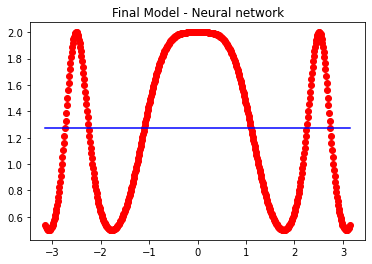

In [10]:
plt.plot(X_np, y_np, 'ro')
plt.plot(X_np, y_hat.detach().numpy(), 'b')
plt.title('Final Model - Neural network')
plt.show()
plt.close()

In [11]:
print('\n'*14)

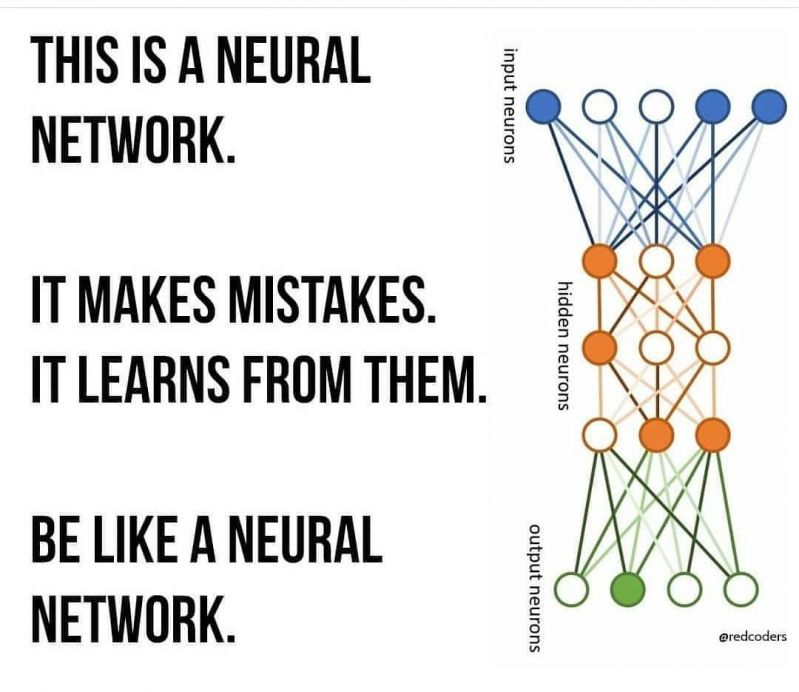

Image from: https://devrant.com/rants/1922673/be-like-a-neural-network